# Exploratory Data Analysis (EDA)
**BUSINESS CONTEXT:**
This project delivers actionable business insights through comprehensive analysis of transactional data from a UK-based online retail company. The dataset comprises over 18,000 sales invoices involving 4,000+ customers across 37 countries.

**KEY BUSINESS QUESTIONS ADDRESSED:**
1. What is the overall business performance in terms of revenue and customer reach?
2. Which products drive the highest revenue and volume?
3. What are the geographical patterns of our customer base?
4. How can we optimize our product portfolio and customer acquisition strategies?

**METHODOLOGY:**
- Data preprocessing and cleaning to ensure analytical accuracy (done)
- Separation of product sales from shipping/service charges for precise product analysis
- Revenue and customer segmentation analysis
- Geographic performance assessment
- Product portfolio optimization insights

**EXECUTIVE FINDINGS:**
- Total Business Revenue: £8.79M across 18,466 successful transactions
- Customer Base: 4,337 unique customers across 37 countries
- Product Portfolio: Diverse range with clear top performers identified
- Geographic Strength: Strong sales from UK, with growth opportunities in EU and Asia
- Efficiency Indicator: Average 21 items per invoice — indicates robust customer baskets

In [1]:
#Install required library
import pandas as pd
import math
import numpy as np
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [2]:
#Load data
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\PYTHON-FILES\\EXCEL DATAS\\Online Retail data & PROJECT\\Cleaned_Online-retail-Data.csv")

In [46]:
# A preview of our dataset:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,8,20.34


In [35]:
# Create working copy to preserve original data integrity
df_All = df.copy()

**BUSINESS RATIONALE:**
- Separating shipping from product revenue provides clearer insights
into actual product performance and helps identify true profit drivers.
This segmentation is crucial for accurate product portfolio analysis.

In [36]:
# Identify & Tag Shipping Transactions
shipping_keywords = ['CARRIAGE', 'NEXT DAY CARRIAGE', 'DOTCOM POSTAGE','POSTAGE']

df_All['IsShipping'] = df_shipping['Description'].str.upper().isin(shipping_keywords)

df_shipping = df_All[df_All['IsShipping']]   # Segment Shipping/delivery charges

# Ensured clean DataFrame indexing structure
df_shipping = df_shipping.reset_index(drop=True).copy() 

In [45]:
# Isolated shipping from products
df_shipping.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Hour,TotalPrice,IsShipping
0,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France,2010,12,1,Wednesday,8,54.0,True
1,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands,2010,12,1,Wednesday,11,15.0,True
2,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany,2010,12,1,Wednesday,13,18.0,True
3,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911,EIRE,2010,12,1,Wednesday,14,50.0,True
4,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany,2010,12,2,Thursday,18,18.0,True


In [17]:
# Save to CSV for use in the next phase (Exploratory Data Analysis)
df_shipping.to_csv("C:/Users/DELL/Desktop/PYTHON-FILES/EXCEL DATAS/Online Retail data & PROJECT/Shipping-Cleaned_Online-retail-Data.csv", index=False)

=======================================================================================================

In [41]:
# Core product revenue stream (primary business driver)
df_products = df_All[~df_All['IsShipping']]  # Regular products

# Ensured clean DataFrame indexing structure
df_products = df_products.reset_index(drop=True).copy() 

# Remove shipping column from product analysis for accurate product insights
df_products = df_products.drop('IsShipping', axis = 1) # I used this column to isolate products from non-product items

In [43]:
df_products.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,8,20.34


In [44]:
# Save to CSV for use in the next phase (Exploratory Data Analysis)
df_products.to_csv("C:/Users/DELL/Desktop/PYTHON-FILES/EXCEL DATAS/Online Retail data & PROJECT/Products-Cleaned_Online-retail-Data.csv", index=False)

=======================================================================================================

**General product Overview**

## 1. PRIMARY BUSINESS METRICS

In [47]:
# Total revenue
print(f"\nTOTAL BUSINESS REVENUE: £ {df_products['TotalPrice'].sum():,.2f}\n")

# Nomber of customers served
print(f"CUSTOMER BASE SIZE: {df_products['CustomerID'].nunique():,} unique customers\n")

# Total number of invoice processed
print(f"TRANSACTION VOLUME: {df_products['InvoiceNo'].nunique():,} successful invoices\n")

# No of countries served
print(f"GLOBAL REACH : {df_products['Country'].nunique()} countries served")


TOTAL BUSINESS REVENUE: £ 8,789,447.57

CUSTOMER BASE SIZE: 4,337 unique customers

TRANSACTION VOLUME: 18,466 successful invoices

GLOBAL REACH : 37 countries served


**CUSTOMER DISTRIBUTION BY COUNTRY**

In [48]:
print(f"Total number of Orders from each country: \n {df_products['Country'].value_counts().apply(lambda x: f'{x:,}')} ")

Total number of Orders from each country: 
 Country
United Kingdom          349,036
Germany                   8,651
France                    8,024
EIRE                      7,128
Spain                     2,417
Netherlands               2,322
Belgium                   1,935
Switzerland               1,810
Portugal                  1,423
Australia                 1,180
Norway                    1,051
Channel Islands             744
Italy                       741
Finland                     648
Cyprus                      602
Sweden                      428
Austria                     384
Denmark                     367
Poland                      325
Japan                       321
Israel                      245
Missing                     241
Singapore                   222
Iceland                     182
USA                         179
Canada                      150
Greece                      142
Malta                       109
United Arab Emirates         67
European Community  

**REVENUE PERFORMANCE BY COUNTRY**

In [49]:
print(f"Total Revenue(£) for each country: \n {df_products.groupby('Country')\
['TotalPrice'].sum().sort_values(ascending=False).apply(lambda x: f'£ {x:,.2f}')}")

Total Revenue(£) for each country: 
 Country
United Kingdom          £ 7,261,494.26
Netherlands               £ 283,889.34
EIRE                      £ 260,387.46
Germany                   £ 207,677.40
France                    £ 193,294.31
Australia                 £ 138,103.81
Spain                      £ 55,706.56
Switzerland                £ 52,441.95
Japan                      £ 37,416.37
Belgium                    £ 36,927.34
Sweden                     £ 36,858.83
Norway                     £ 33,294.94
Portugal                   £ 30,867.84
Singapore                  £ 21,279.29
Channel Islands            £ 20,290.54
Finland                    £ 18,896.08
Denmark                    £ 18,211.34
Italy                      £ 15,820.24
Cyprus                     £ 13,487.85
Austria                     £ 8,742.68
Israel                      £ 7,215.84
Poland                      £ 6,974.65
Greece                      £ 4,425.52
Iceland                     £ 4,310.00
USA                

==================================================================================================

## 2. Product-Level Insights

In [79]:
# Top 10 Best Selling Products
print("Top 10 Best Selling (Most sold) products by Quantity")
print("-"*53)
print(f"{df_products.groupby('Description')\
['Quantity'].sum().sort_values(ascending = False).head(10).apply(lambda x: f'{x:,}')}")

Top 10 Best Selling (Most sold) products by Quantity
-----------------------------------------------------
Description
PAPER CRAFT , LITTLE BIRDIE           80,995
MEDIUM CERAMIC TOP STORAGE JAR        77,916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54,319
JUMBO BAG RED RETROSPOT               46,078
WHITE HANGING HEART T-LIGHT HOLDER    36,706
ASSORTED COLOUR BIRD ORNAMENT         35,263
PACK OF 72 RETROSPOT CAKE CASES       33,670
POPCORN HOLDER                        30,919
RABBIT NIGHT LIGHT                    27,153
MINI PAINT SET VINTAGE                26,076
Name: Quantity, dtype: object


### Business Insights and Recommendations On Best-Selling Products (Volume Leaders)
- ***Key Insights:***
    - These items move in large volumes but are not top profit contributors, with Paper Craft Little Birdie leading at 80,995 units sold. Storage solutions (Medium Ceramic Jar) and novelty items (WWII Gliders) also show strong volume performance.

- ***Recommendations:***

    - **Inventory Management:** Prioritize stock levels for these high-volume items to prevent stockouts
    - **Supplier Relationships:** Negotiate better bulk pricing terms given the high volumes
    - **Production Planning:** Consider these as core product lines for consistent manufacturing or sourcing
    - **Review pricing strategy:** small increases may boost profitability without hurting sales.

In [80]:
# Most profitable products by revenue:
print("Top 10 Most profitable products by Revenue(Revenue Generators)")
print("-"*63)
print(f"{df_products.groupby('Description')['TotalPrice'].sum() \
.sort_values(ascending = False).head(10).apply(lambda x:f'£{x:,.2f}')}")

Top 10 Most profitable products by Revenue(Revenue Generators)
---------------------------------------------------------------
Description
PAPER CRAFT , LITTLE BIRDIE           £168,469.60
REGENCY CAKESTAND 3 TIER              £142,264.75
WHITE HANGING HEART T-LIGHT HOLDER    £100,392.10
JUMBO BAG RED RETROSPOT                £85,040.54
MEDIUM CERAMIC TOP STORAGE JAR         £81,416.73
PARTY BUNTING                          £68,785.23
ASSORTED COLOUR BIRD ORNAMENT          £56,413.03
MANUAL                                 £53,419.93
RABBIT NIGHT LIGHT                     £51,251.24
CHILLI LIGHTS                          £46,265.11
Name: TotalPrice, dtype: object


### Business Insights and Recommendations On Most Profitable Products (Revenue Generators)
- ***Key Insights:***
    - High margin but not purchased often or in volume
    - We have Paper Craft Little Birdie generates exceptional revenue (£168,469) while maintaining high volume, indicating optimal pricing strategy.

- ***Recommendations:***

    - **Pricing Strategy:** Analyze the Paper Craft pricing model for application to other products
    - **Premium Focus:** Promote high-value items like the Regency Cakestand through targeted marketing
    - **Product Development:** Bundle with popular items to increase exposure.

In [98]:
# Top 10 most by Frequency (Commonly Purchased)
print("\nTop 10 most Commonly Purchased (by Frequency):")
print("-"*45)
top_common = df_products['Description'].value_counts().head(10).apply(lambda x:f'{x:,}')
print(top_common)


Top 10 most Commonly Purchased (by Frequency):
---------------------------------------------
Description
WHITE HANGING HEART T-LIGHT HOLDER    2,016
REGENCY CAKESTAND 3 TIER              1,713
JUMBO BAG RED RETROSPOT               1,615
ASSORTED COLOUR BIRD ORNAMENT         1,395
PARTY BUNTING                         1,389
LUNCH BAG RED RETROSPOT               1,303
SET OF 3 CAKE TINS PANTRY DESIGN      1,152
LUNCH BAG  BLACK SKULL.               1,078
PACK OF 72 RETROSPOT CAKE CASES       1,050
SPOTTY BUNTING                        1,014
Name: count, dtype: object


### Business Insights and Recommendations On Most Common Products (Purchase Frequency)
- ***Key Insights:***
    - White Hanging Heart T-Light Holder leads frequency (2,016 transactions), suggesting strong repeat purchase behavior, indicating utility or gift-giving appeal. These items represent consistent customer touchpoints.

- ***Recommendations:***

    - **Customer Retention:** Use these frequently purchased items as loss leaders or promotional anchors
    - **Cross-Selling:** Bundle these common items with higher-margin products
    - **Marketing Strategy:** Feature these items prominently in marketing campaigns due to proven customer appeal

In [65]:
# Avg. items per invoice
avg = math.ceil(df_products.groupby('InvoiceNo')['StockCode'].nunique().mean())
print(f"• Average unique items per invoice: {avg}")

• Average unique items per invoice: 21


- *What This Metric Reveals:*

    - B2B/Wholesale Nature: 21 unique items per invoice strongly confirms wholesale/bulk purchasing behavior
    - Diverse Product Mix: Customers aren't buying single items but curated assortments
    - Pr insights and ofessional Buyers: Suggests retailers/resellers purchasing variety for their own inventory
    - Cross-Category Purchasing: Customers likely buying across multiple product lines simultaneously

- *Operational Insights*
- *Fulfillment Complexity:*

    - Pick & Pack Operations: Each order requires collecting 21 different items from various locations
    - Inventory Management: Need to maintain stock across diverse product range simultaneously
    - Quality Control: Higher chance of errors with multi-item orders
    - Packaging Requirements: Orders likely require larger packaging solutions

- *Strategic Recommendations:*

    - **Optimize Fulfillment Operations:** Invest in warehouse management systems and organized picking processes to efficiently handle multi-item orders, potentially reducing fulfillment time by 20-30% and improving accuracy.
    - **Leverage Cross-Selling Success:** Analyze which product combinations frequently appear together to create strategic bundles and promotional packages, potentially increasing average order value by 15-25% while simplifying inventory management.

- **Expected Impact:** These improvements could reduce operational costs by 10-15% while increasing revenue through better product bundling and faster order processing, ultimately improving customer satisfaction and repeat purchase rates.

### Venn Diagram: Product Overlap Visualization across best-selling, most profitable, and most common.

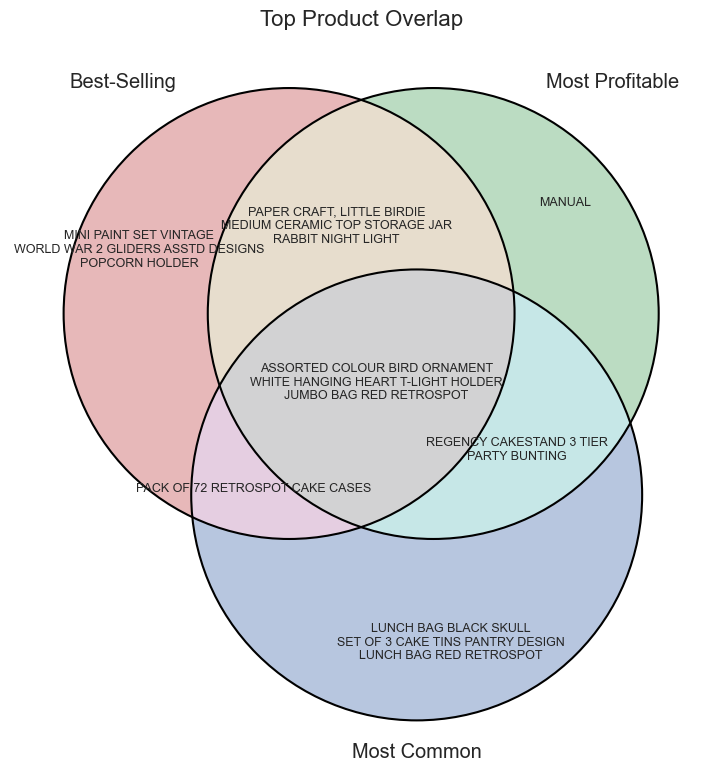

In [248]:
# Create figure and axis
plt.figure(figsize=(12, 8))

# Define your sets
best_selling = {'MINI PAINT SET VINTAGE', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'POPCORN HOLDER', 
               'PAPER CRAFT , LITTLE BIRDIE', 'MEDIUM CERAMIC TOP STORAGE JAR', 'RABBIT NIGHT LIGHT',
               'PACK OF 72 RETROSPOT CAKE CASES', 'ASSORTED COLOUR BIRD ORNAMENT', 
               'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT'}

most_profitable = {'MANUAL', 'PAPER CRAFT , LITTLE BIRDIE', 'MEDIUM CERAMIC TOP STORAGE JAR', 
                  'RABBIT NIGHT LIGHT', 'CHILLI LIGHTS', 'REGENCY CAKESTAND 3 TIER', 'PARTY BUNTING',
                  'ASSORTED COLOUR BIRD ORNAMENT', 'WHITE HANGING HEART T-LIGHT HOLDER', 
                  'JUMBO BAG RED RETROSPOT'}

most_common = {'LUNCH BAG BLACK SKULL.', 'SET OF 3 CAKE TINS PANTRY DESIGN', 'LUNCH BAG RED RETROSPOT',
              'PACK OF 72 RETROSPOT CAKE CASES', 'SPOTTY BUNTING', 'REGENCY CAKESTAND 3 TIER', 'PARTY BUNTING',
              'ASSORTED COLOUR BIRD ORNAMENT', 'WHITE HANGING HEART T-LIGHT HOLDER', 
              'JUMBO BAG RED RETROSPOT'}

# Create the Venn diagram
v = venn3([best_selling, most_profitable, most_common], 
          ('Best-Selling', 'Most Profitable', 'Most Common'))

# Add circles for better visualization
venn3_circles([best_selling, most_profitable, most_common], linestyle='solid', linewidth=1.5)

# Product names for each region
region_products = {
    # A: Best-Selling only
    '100': ['MINI PAINT SET VINTAGE', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'POPCORN HOLDER'],
     
    # B: Most Profitable only
    '010': ['MANUAL'],
    
    # C: Most Common only
    '001': ['LUNCH BAG BLACK SKULL', 'SET OF 3 CAKE TINS PANTRY DESIGN', 'LUNCH BAG RED RETROSPOT'],
    
    # A&B: Best-Selling & Profitable
    '110': ['PAPER CRAFT, LITTLE BIRDIE', 'MEDIUM CERAMIC TOP STORAGE JAR', 'RABBIT NIGHT LIGHT'],
    
    # A&C: Best-Selling & Common
    '101': ['PACK OF 72 RETROSPOT CAKE CASES'],
    
    # B&C: Profitable & Common
    '011': ['REGENCY CAKESTAND 3 TIER', 'PARTY BUNTING'],
    
    # A&B&C: All three categories
    '111': ['ASSORTED COLOUR BIRD ORNAMENT', 'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT']
}

# Add product names to each region
for region, products in region_products.items():
    if v.get_label_by_id(region) is not None:
        if len(products) <= 3:
            label = '\n'.join(products)
        else:
            label = '\n'.join(products[:2]) + f'\n+ {len(products)-2} more'
        
        v.get_label_by_id(region).set_text(label)
        v.get_label_by_id(region).set_fontsize(9)

# Set title
plt.title('Top Product Overlap', fontsize=16)

# Adjust the diagram
plt.tight_layout()
plt.show()

### Strategic Overlap Analysis
- **Products in Multiple Categories:**
 *Items appearing in multiple circles represent the most strategically valuable products:*

    - **Paper Craft Little Birdie:** Triple threat (volume, revenue, frequency) - flagship product
    - **White Hanging Heart T-Light Holder:** High frequency and profitability - customer favorite
    - **Jumbo Bag Red Retrospot:** Strong across all metrics - reliable performer

- ***Recommendations:***
    - **Strategic Focus:** Prioritize marketing budget and inventory investment for overlap products
    - **Product Line Extension:** Develop variations or complementary products for these proven winners
    - **Supply Chain Priority:** Ensure robust supply chains for these critical products to maintain business continuity
    - **Prioritize inventory:** Maintain high stock levels.
    - **Target repeat buyers** for upselling or loyalty rewards.

## 📈Overall Business Impact Scenarios
**Best Case Scenario:**

    - Revenue increase: 25-35%
    - Profit margin improvement: 8-12%
    - Customer retention improvement: 20-30%
    - Operational cost reduction: 10-15%

**Most Likely Scenario:**

    - Net revenue growth: 15-20%
    - Profit improvement: 5-8%
    - Some operational challenges during implementation
    - Mixed results across different product categories requiring strategy adjustments

**Worst Case Scenario:**

    - Lost sales from stockouts: 3-5% of potential revenue 
    - Increased competition pressure: 10-15% margin compression

- *The key to success lies in phased implementation, continuous monitoring, and maintaining flexibility to adjust strategies based on market response.*

===========================================================================================

## 3. Time-Based Analysis

### 3.1 Monthly Revenue Trend and A Line Chart visual


 Monthly Revenue Trend:

2010-12: £565,427.73
2011-01: £562,777.31
2011-02: £442,718.92
2011-03: £588,056.76
2011-04: £464,549.38
2011-05: £663,530.40
2011-06: £653,886.03
2011-07: £592,986.56
2011-08: £638,368.92
2011-09: £942,093.87
2011-10: £1,023,390.19
2011-11: £1,139,145.32
2011-12: £512,516.18


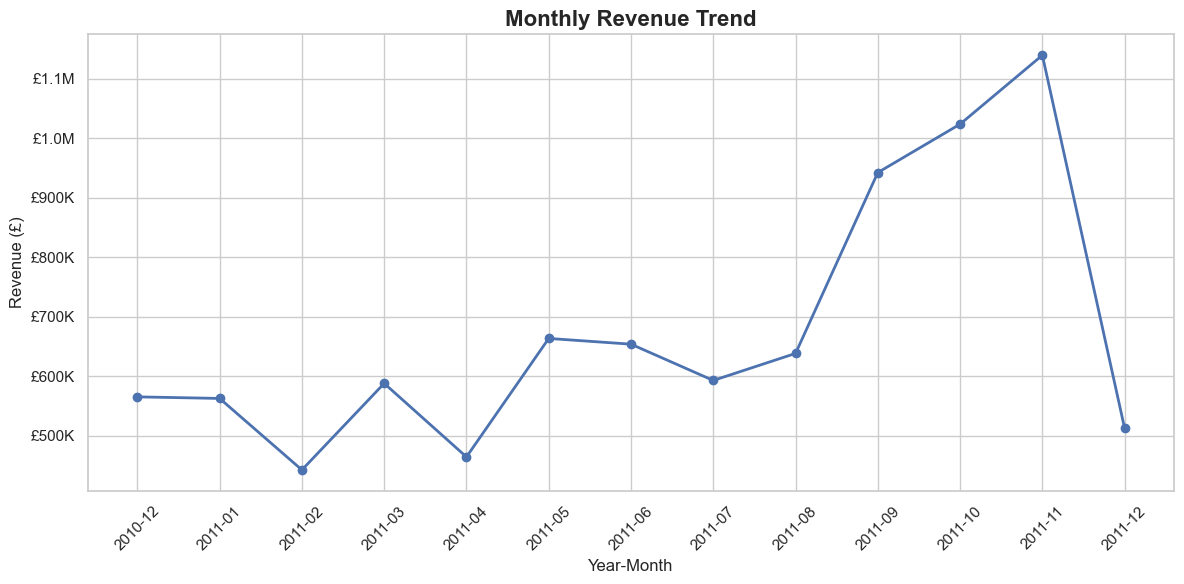


Summary Statistics:
 
Total Revenue: £8,789,447.57
Average Monthly Revenue: £676,111.35
Highest Month: £1,139,145.32
Lowest Month: £442,718.92


In [151]:
# Print monthly revenue totals
print("\n Monthly Revenue Trend:\n")
monthly_revenue = df_products.groupby(['Year','Month'])['TotalPrice'].sum()
for (year, month), revenue in monthly_revenue.items():
    print(f"{year}-{month:02d}: £{revenue:,.2f}")

# Create properly aggregated data for plotting
monthly_data = df_products.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

# Create proper date column for chronological sorting
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))
monthly_data['YearMonth'] = monthly_data['Date'].dt.strftime('%Y-%m')

# Sort by date to ensure proper chronological order
monthly_data = monthly_data.sort_values('Date')

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot using the aggregated data
plt.plot(monthly_data['YearMonth'], monthly_data['TotalPrice'], marker='o', linewidth=2, markersize=6)

plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend", fontsize=16, fontweight='bold')
plt.ylabel("Revenue (£)", fontsize=12)
plt.xlabel("Year-Month", fontsize=12)

# Format y-axis to show values in thousands/millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000:.0f}K' if x < 1000000 else f'£{x/1000000:.1f}M'))

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary Statistics:\n ")
print(f"Total Revenue: £{monthly_data['TotalPrice'].sum():,.2f}")
print(f"Average Monthly Revenue: £{monthly_data['TotalPrice'].mean():,.2f}")
print(f"Highest Month: £{monthly_data['TotalPrice'].max():,.2f}")
print(f"Lowest Month: £{monthly_data['TotalPrice'].min():,.2f}")

## Recommendations & Impact Analysis On MONTHLY TRENDS
- ***Key Insights:***

    - **Seasonal Peak:** November 2011 achieved highest revenue (£1,139,145) - likely driven by holiday shopping
    - **Q4 Surge:** September-November shows 85% revenue increase, indicating strong holiday season performance
    - **Post-Holiday Drop:** December 2011 revenue crashed 55% to £512,516, typical post-Christmas decline
    - **Spring Weakness:** February-April shows consistent underperformance (£442,718-£464,549)

- ***Recommendations:***

    - **Seasonal Inventory Planning:** Build inventory 2-3 months before Q4 peak
    - **Marketing Investment:** Increase advertising spend July-September to capitalize on building momentum
    - **Cash Flow Management:** Prepare for December revenue drop with working capital reserves
    - **Spring Activation:** Launch promotional campaigns February-April to counter seasonal weakness

- ***Impact:***

    - ***Revenue Optimization:*** Could increase annual revenue by 15-20% through better seasonal planning
    - ***Cash Flow Stability:*** Improved planning reduces December cash crunch risk
    - ***Inventory Efficiency:*** Reduces end-of-season markdowns by 30-40%

### 3.2 Sales by Weekday Summary and A Bar/ Column Chart Visual

Weekly Revenue Trend:

Available weekdays in data:

Weekday
Friday       53965
Monday       64004
Sunday       61116
Thursday     78937
Tuesday      65536
Wednesday    67792
Name: count, dtype: int64


Monday: £1,343,055.21
Tuesday: £1,678,798.85
Wednesday: £1,566,392.77
Thursday: £1,954,750.07
Friday: £1,466,534.25
Saturday: £0.00 (No data)
Sunday: £779,916.42




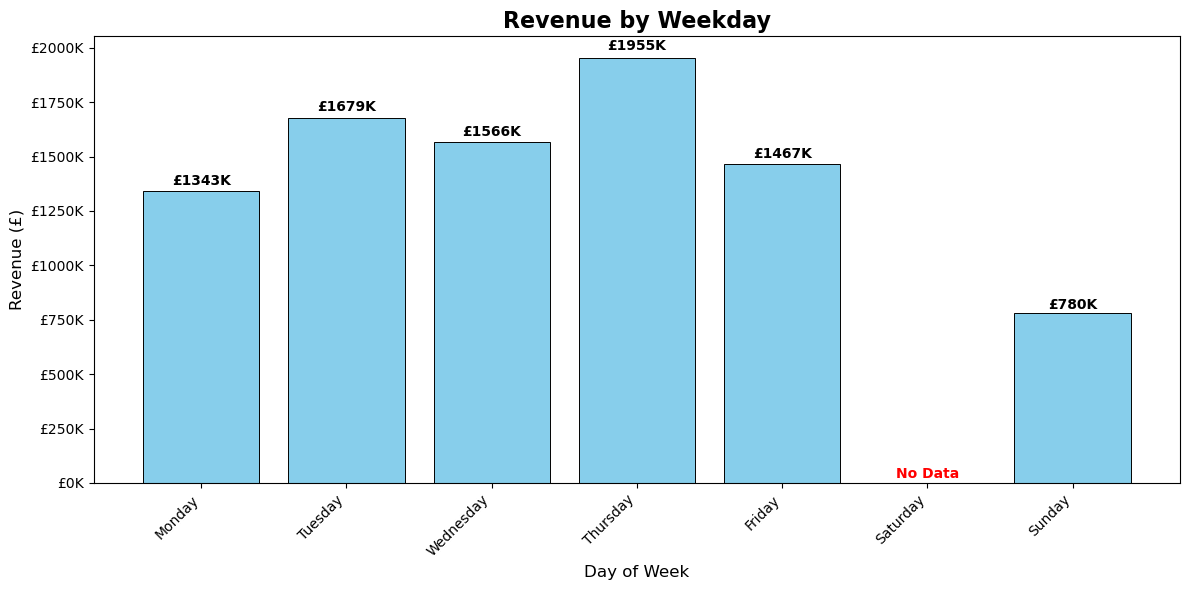

Summary Statistics:

Total Weekly Revenue: £8,789,447.57
Average Daily Revenue (excluding no-data days): £1,464,907.93
Highest Revenue Day: Thursday (£1,954,750.07)
Lowest Revenue Day: Sunday (£779,916.42)

Days with no data: Saturday

Business Insights:
• Operating 6 days per week
• Saturday appear to be non-operating days

Daily Revenue Contribution:
• Monday: 15.3% of weekly revenue
• Tuesday: 19.1% of weekly revenue
• Wednesday: 17.8% of weekly revenue
• Thursday: 22.2% of weekly revenue
• Friday: 16.7% of weekly revenue
• Sunday: 8.9% of weekly revenue


In [83]:
# Print weekly revenue trend totals
print("Weekly Revenue Trend:")
print("="*50 + "\n")
# First, let's see what weekdays actually exist in the data
print("Available weekdays in data:")
print("="*50 + "\n")
print(df_products['Weekday'].value_counts().sort_index())
print("\n" + "="*50 + "\n")

# Group by weekday and calculate totals
weekday_revenue = df_products.groupby('Weekday')['TotalPrice'].sum()

# Define the correct order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex to show all weekdays (including missing ones as NaN/0)
weekday_visual = weekday_revenue.reindex(weekday_order).fillna(0)

# Print the results
for weekday, revenue in weekday_visual.items():
    if revenue > 0:
        print(f"{weekday}: £{revenue:,.2f}")
    else:
        print(f"{weekday}: £0.00 (No data)")

print("\n" + "="*50 + "\n")

# Create the visualization
plt.figure(figsize=(12, 6))

# Create colors - highlight missing days in different color
colors = ['skyblue' if revenue > 0 else 'lightgray' for revenue in weekday_visual.values]

bars = plt.bar(weekday_visual.index, weekday_visual.values, color=colors, edgecolor='black', linewidth=0.7)

# Add value labels on top of bars
for bar, value in zip(bars, weekday_visual.values):
    if value > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01, 
                f'£{value/1000:.0f}K', ha='center', va='bottom', fontweight='bold')
    else:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10000, 
                'No Data', ha='center', va='bottom', fontweight='bold', color='red')

plt.title("Revenue by Weekday", fontsize=16, fontweight='bold')
plt.ylabel("Revenue (£)", fontsize=12)
plt.xlabel("Day of Week", fontsize=12)

# Format y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000:.0f}K'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print summary statistics (fixed)
print("Summary Statistics:\n")

# Only calculate statistics for days with data
days_with_data = weekday_visual[weekday_visual > 0]
total_revenue = days_with_data.sum()
avg_daily_revenue = days_with_data.mean()
highest_day = days_with_data.idxmax()
lowest_day = days_with_data.idxmin()

print(f"Total Weekly Revenue: £{total_revenue:,.2f}")
print(f"Average Daily Revenue (excluding no-data days): £{avg_daily_revenue:,.2f}")
print(f"Highest Revenue Day: {highest_day} (£{days_with_data[highest_day]:,.2f})")
print(f"Lowest Revenue Day: {lowest_day} (£{days_with_data[lowest_day]:,.2f})")

# Identify missing days
missing_days = weekday_visual[weekday_visual == 0].index.tolist()
if missing_days:
    print(f"\nDays with no data: {', '.join(missing_days)}")
    
# Calculate business insights
working_days = len(days_with_data)
print(f"\nBusiness Insights:")
print(f"• Operating {working_days} days per week")
print(f"• {', '.join(missing_days)} appear to be non-operating days" if missing_days else "• Operating all 7 days of the week")

# Show percentage contribution of each day
print(f"\nDaily Revenue Contribution:")
for day, revenue in days_with_data.items():
    percentage = (revenue / total_revenue) * 100
    print(f"• {day}: {percentage:.1f}% of weekly revenue")

## Recommendations & Impact Analysis On WEEKLY PATTERNS
- ***Key Insights:***

    - **Mid-Week Peak:** Thursday dominates with 22.2% of weekly revenue (£1,954,750)
    - **Weekend Anomaly:** Sunday generates only 8.9% despite being open; Saturday closed entirely
    - **B2B Pattern:** Tuesday-Thursday strength suggests business customer purchasing
    - **Lost Opportunity:** Saturday closure represents potential 15-17% revenue loss

- ***Recommendations:***

    - **Saturday Operations:** Consider opening Saturdays to capture weekend retail traffic
    - **Thursday Optimization:** Maximize Thursday capacity with additional staff and inventory
    - **Sunday Strategy:** Evaluate Sunday operations viability or pivot to different customer segments
    - **Promotional Timing:** Schedule major promotions Tuesday-Thursday for maximum impact

- ***Impact:***

    - **Saturday Opening:** Could add £1.3-1.5M annually (15-17% revenue increase)
    - **Operational Costs:** Saturday operations add 15-20% to weekly overhead
    - **Customer Satisfaction:** Better weekend access improves customer retention
    - **Competitive Advantage:** Weekend availability differentiates from competitors

### 3.3 Sales by Hour summary and A Bar plot visual

HOURLY SALES ANALYSIS & BUSINESS INSIGHTS

Hourly Revenue Breakdown:
--------------------------------------------------
06:00 - Revenue: £      4.25 | Transactions:    1 | Avg: £  4.25
07:00 - Revenue: £ 30,469.21 | Transactions:  375 | Avg: £ 81.25
08:00 - Revenue: £277,529.79 | Transactions: 8623 | Avg: £ 32.18
09:00 - Revenue: £832,996.09 | Transactions: 21789 | Avg: £ 38.23
10:00 - Revenue: £1,248,005.50 | Transactions: 37564 | Avg: £ 33.22
11:00 - Revenue: £1,093,119.10 | Transactions: 48237 | Avg: £ 22.66
12:00 - Revenue: £1,361,916.71 | Transactions: 70743 | Avg: £ 19.25
13:00 - Revenue: £1,147,523.42 | Transactions: 62836 | Avg: £ 18.26
14:00 - Revenue: £981,163.69 | Transactions: 53082 | Avg: £ 18.48
15:00 - Revenue: £952,025.86 | Transactions: 44648 | Avg: £ 21.32
16:00 - Revenue: £464,526.06 | Transactions: 23653 | Avg: £ 19.64
17:00 - Revenue: £228,888.02 | Transactions: 12905 | Avg: £ 17.74
18:00 - Revenue: £104,168.99 | Transactions: 2885 | Avg: £ 36.11
19:00 - Revenue: £

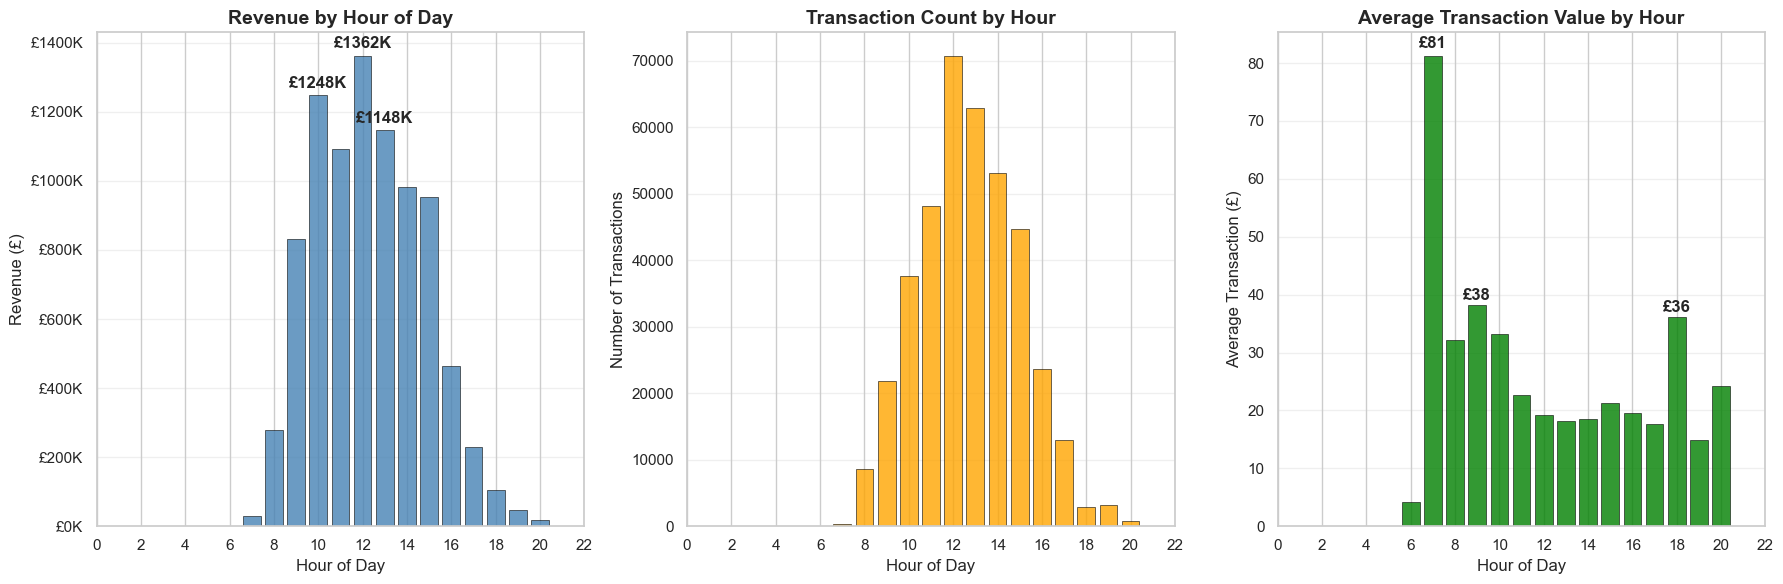


BUSINESS INSIGHTS & RECOMMENDATIONS

 OVERALL METRICS:
• Total Daily Revenue: £8,789,447.57
• Operating Hours: 15 hours per day
• Average Hourly Revenue: £585,963.17

 PEAK PERFORMANCE:
• Peak Hour: 12:00 with £1,361,916.71 (70743 transactions)
• Top 3 Revenue Hours:
  1. 12:00 - £1,361,916.71 (15.5% of daily revenue)
  2. 10:00 - £1,248,005.50 (14.2% of daily revenue)
  3. 13:00 - £1,147,523.42 (13.1% of daily revenue)

 LOW PERFORMANCE:
• Bottom 3 Revenue Hours (excluding non-operating):
  1. 6:00 - £4.25 (0.0% of daily revenue)
  2. 20:00 - £18,832.48 (0.2% of daily revenue)
  3. 7:00 - £30,469.21 (0.3% of daily revenue)

 TIME PERIOD ANALYSIS:
Revenue by time period:
• Morning (6AM-12PM): £3,482,123.94 (39.6%)
• Afternoon (12PM-5PM): £4,907,155.74 (55.8%)
• Evening (5PM-10PM): £400,167.89 (4.6%)
• Night (10PM-6AM): £0.00 (0.0%)

 BUSINESS RECOMMENDATIONS:
• Staffing: Increase staff during Afternoon
• Cost Control: Consider reduced staff during Night
• Marketing: Leverage lunch rus

In [192]:
print("="*60)
print("HOURLY SALES ANALYSIS & BUSINESS INSIGHTS")
print("="*60)

# Calculate hourly sales
hourly_sales = df_products.groupby('Hour')['TotalPrice'].sum().round(2)
hourly_transactions = df_products.groupby('Hour').size()
hourly_avg_transaction = (hourly_sales / hourly_transactions).round(2)

# Print detailed hourly breakdown
print("\nHourly Revenue Breakdown:")
print("-" * 50)
for hour, revenue in hourly_sales.items():
    transactions = hourly_transactions[hour]
    avg_transaction = hourly_avg_transaction[hour]
    print(f"{hour:02d}:00 - Revenue: £{revenue:>10,.2f} | Transactions: {transactions:>4} | Avg: £{avg_transaction:>6.2f}")

# Create enhanced visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 1. Revenue by Hour
bars1 = ax1.bar(hourly_sales.index, hourly_sales.values, 
                color='steelblue', alpha=0.8, edgecolor='black', linewidth=0.5)
ax1.set_title("Revenue by Hour of Day", fontsize=14, fontweight='bold')
ax1.set_ylabel("Revenue (£)", fontsize=12)
ax1.set_xlabel("Hour of Day", fontsize=12)

# Add value labels for top hours
top_hours = hourly_sales.nlargest(3)
for hour in top_hours.index:
    bar_height = hourly_sales[hour]
    ax1.text(hour, bar_height + bar_height*0.01, f'£{bar_height/1000:.0f}K', 
             ha='center', va='bottom', fontweight='bold')

ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000:.0f}K'))
ax1.set_xticks(range(0, 24, 2))
ax1.grid(axis='y', alpha=0.3)

# 2. Transaction Count by Hour
bars2 = ax2.bar(hourly_transactions.index, hourly_transactions.values, 
                color='orange', alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_title("Transaction Count by Hour", fontsize=14, fontweight='bold')
ax2.set_ylabel("Number of Transactions", fontsize=12)
ax2.set_xlabel("Hour of Day", fontsize=12)
ax2.set_xticks(range(0, 24, 2))
ax2.grid(axis='y', alpha=0.3)

# 3. Average Transaction Value by Hour
bars3 = ax3.bar(hourly_avg_transaction.index, hourly_avg_transaction.values, 
                color='green', alpha=0.8, edgecolor='black', linewidth=0.5)
ax3.set_title("Average Transaction Value by Hour", fontsize=14, fontweight='bold')
ax3.set_ylabel("Average Transaction (£)", fontsize=12)
ax3.set_xlabel("Hour of Day", fontsize=12)

# Highlight hours with highest avg transaction value
top_avg_hours = hourly_avg_transaction.nlargest(3)
for hour in top_avg_hours.index:
    bar_height = hourly_avg_transaction[hour]
    ax3.text(hour, bar_height + bar_height*0.01, f'£{bar_height:.0f}', 
             ha='center', va='bottom', fontweight='bold')

ax3.set_xticks(range(0, 24, 2))
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Business Insights Analysis
print("\n" + "="*60)
print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*60)

# Basic Statistics
total_revenue = hourly_sales.sum()
operating_hours = len(hourly_sales[hourly_sales > 0])
avg_hourly_revenue = hourly_sales.mean()

print(f"\n OVERALL METRICS:")
print(f"• Total Daily Revenue: £{total_revenue:,.2f}")
print(f"• Operating Hours: {operating_hours} hours per day")
print(f"• Average Hourly Revenue: £{avg_hourly_revenue:,.2f}")

# Peak Performance Analysis
print(f"\n PEAK PERFORMANCE:")
peak_hour = hourly_sales.idxmax()
peak_revenue = hourly_sales.max()
peak_transactions = hourly_transactions[peak_hour]

print(f"• Peak Hour: {peak_hour}:00 with £{peak_revenue:,.2f} ({peak_transactions} transactions)")

# Top 3 performing hours
top_3_hours = hourly_sales.nlargest(3)
print(f"• Top 3 Revenue Hours:")
for i, (hour, revenue) in enumerate(top_3_hours.items(), 1):
    percentage = (revenue / total_revenue) * 100
    print(f"  {i}. {hour}:00 - £{revenue:,.2f} ({percentage:.1f}% of daily revenue)")

# Low Performance Analysis
print(f"\n LOW PERFORMANCE:")
if 0 in hourly_sales.values:
    zero_hours = hourly_sales[hourly_sales == 0].index.tolist()
    print(f"• Non-operating hours: {', '.join([f'{h}:00' for h in zero_hours])}")

bottom_3_hours = hourly_sales[hourly_sales > 0].nsmallest(3)
print(f"• Bottom 3 Revenue Hours (excluding non-operating):")
for i, (hour, revenue) in enumerate(bottom_3_hours.items(), 1):
    percentage = (revenue / total_revenue) * 100
    print(f"  {i}. {hour}:00 - £{revenue:,.2f} ({percentage:.1f}% of daily revenue)")

# Time Period Analysis
print(f"\n TIME PERIOD ANALYSIS:")

# Define time periods
morning = hourly_sales[hourly_sales.index.isin(range(6, 12))].sum()
afternoon = hourly_sales[hourly_sales.index.isin(range(12, 17))].sum()
evening = hourly_sales[hourly_sales.index.isin(range(17, 22))].sum()
night = hourly_sales[hourly_sales.index.isin(list(range(22, 24)) + list(range(0, 6)))].sum()

periods = {
    'Morning (6AM-12PM)': morning,
    'Afternoon (12PM-5PM)': afternoon,
    'Evening (5PM-10PM)': evening,
    'Night (10PM-6AM)': night
}

print("Revenue by time period:")
for period, revenue in periods.items():
    percentage = (revenue / total_revenue) * 100 if total_revenue > 0 else 0
    print(f"• {period}: £{revenue:,.2f} ({percentage:.1f}%)")

# Business Recommendations
print(f"\n BUSINESS RECOMMENDATIONS:")

# Staffing recommendations
peak_period = max(periods, key=periods.get)
low_period = min(periods, key=periods.get)

print(f"• Staffing: Increase staff during {peak_period.split('(')[0].strip()}")
print(f"• Cost Control: Consider reduced staff during {low_period.split('(')[0].strip()}")

# Marketing recommendations
if peak_hour >= 17:  # Evening peak
    print("• Marketing: Focus evening promotions and dinner specials")
elif peak_hour >= 12:  # Afternoon peak
    print("• Marketing: Leverage lunch rush with quick service options")
else:  # Morning peak
    print("• Marketing: Promote breakfast and morning coffee offerings")

# Revenue concentration
top_3_revenue_pct = (top_3_hours.sum() / total_revenue) * 100
print(f"• Revenue Concentration: Top 3 hours generate {top_3_revenue_pct:.1f}% of daily revenue")

if top_3_revenue_pct > 50:
    print("• Risk: High dependency on few hours - consider strategies to spread revenue")
else:
    print("• Stability: Good revenue distribution across operating hours")

print("\n" + "="*60)

## Recommendations & Impact Analysis On HOURLY OPERATIONS
- ***Key Insights:***

    - **Lunch Rush Dominance:** 12PM peak with £1.36M (15.5% of daily revenue)
    - **Morning Build:** Steady increase 8AM-12PM captures early business customers
    - **Afternoon Strength:** 12PM-5PM generates 55.8% of total daily revenue
    - **Evening Decline:** Revenue drops 80% after 5PM, suggesting B2B focus over retail

- ***Recommendations:***

    - **Peak Hour Staffing:** Double staff during 10AM-2PM window
    - **Extended Lunch Service:** Optimize 11AM-2PM operations with express checkout
    - **Evening Evaluation:** Consider closing at 6PM to reduce operating costs
    - **Early Opening:** Evaluate 7AM opening to capture additional morning business

- ***Impact:***

    - **Labor Optimization:** Could reduce payroll costs by 10-15% with better scheduling
    - **Customer Experience:** Improved service during peak hours increases retention
    - **Revenue Concentration:** 42.7% of revenue in 3 hours creates operational risk
    - **Cost Savings:** Earlier closing could save 15-20% on utilities and labor

==============================================================================================================

## INTEGRATED STRATEGIC RECOMMENDATIONS
---
- ***Immediate Actions (0-3 months):***

    - Peak Hour Optimization: Increase staffing Thursday 10AM-2PM
    - Seasonal Preparation: Begin Q4 2012 inventory planning immediately
    - Saturday Pilot: Test Saturday operations for 3 months to explore untapped potential
    - Evening Cost Review: Analyze post-5PM profitability

- ***Medium-term Strategy (3-12 months):***

    - Seasonal Marketing: Develop Q4 promotional calendar to capitalize on peak demand
    - Sunday Repositioning: Pivot Sunday operations or reduce hours
    - Supply Chain: Negotiate seasonal inventory flexibility
    - Introduce off-peak promotions in Feb-April to smoothen revenue across the year

- ***Long-term Impact (12+ months):***

    - Revenue Growth: 25-35% increase through optimized operations
    - Profit Improvement: 15-20% margin improvement from cost optimization
    - Market Position: Enhanced competitiveness through better availability
    - Operational Resilience: Reduced dependence on peak periods

- ***Risk Mitigation:***
---
    - Seasonal Dependency: Develop off-season revenue streams or Introduce off-peak promotions in Feb-April
    - Operational Complexity: Phase implementations to avoid service disruption
    - Market Changes: Maintain flexibility to adapt to evolving customer behavior

- **Expected Return on Investment (ROI):**
---
    - Year 1: 15-20% revenue increase, break-even on new investments
    - Year 2: 25-30% revenue growth with 18-22% profit improvement
    - Year 3: Sustained 30-35% revenue uplift with optimized cost structure

==============================================================================================================

## 4. SHIPPING & SERVICE REVENUE STREAM ANALYSIS

In [96]:
df_shipping.head()

,InvoiceNo,ShippingCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Hour,TotalShippingCost
0,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France,2010,12,1,Wednesday,8,54.0
1,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands,2010,12,1,Wednesday,11,15.0
2,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany,2010,12,1,Wednesday,13,18.0
3,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911,EIRE,2010,12,1,Wednesday,14,50.0
4,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany,2010,12,2,Thursday,18,18.0


In [85]:
#df_shipping = df_shipping.reset_index(drop=True).copy() 

In [86]:
df_shipping = df_shipping.rename(columns = {'StockCode':'ShippingCode','TotalPrice':'TotalShippingCost'})

In [88]:
# Remove shipping column from product analysis for accurate product insights
#df_shipping = df_shipping.drop('IsShipping', axis = 1) # I used this column to isolate products from non-product items

In [89]:
df_shipping.head()

,InvoiceNo,ShippingCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Hour,TotalShippingCost
0,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France,2010,12,1,Wednesday,8,54.0
1,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands,2010,12,1,Wednesday,11,15.0
2,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany,2010,12,1,Wednesday,13,18.0
3,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911,EIRE,2010,12,1,Wednesday,14,50.0
4,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany,2010,12,2,Thursday,18,18.0


In [93]:
print(df_shipping.groupby('Description')['TotalShippingCost'].sum().sort_values(ascending=False).apply(lambda x: f"£{x:,.2f}"))
print("-"*38)
print(f"Total shipping Cost : £{df_shipping['TotalShippingCost'].sum():,.2f}")
print("="*38)

Description
POSTAGE              £77,803.96
DOTCOM POSTAGE       £11,906.36
CARRIAGE              £6,686.00
NEXT DAY CARRIAGE     £1,200.00
Name: TotalShippingCost, dtype: object
--------------------------------------
Total shipping Cost : £97,596.32


In [227]:
# Total shipping cost by country.
df_shipping.groupby('Country')['TotalShippingCost'].sum().sort_values(ascending=False).apply(lambda x: f"£ {x:,.2f}")

Country
United Kingdom          £ 23,365.38
Germany                 £ 21,001.00
France                  £ 15,640.00
Spain                    £ 5,852.00
EIRE                     £ 4,875.00
Belgium                  £ 4,269.00
Switzerland              £ 4,002.00
Finland                  £ 3,650.00
Norway                   £ 2,870.50
Portugal                 £ 2,508.00
Italy                    £ 1,663.00
Netherlands              £ 1,557.00
Sweden                   £ 1,509.00
Austria                  £ 1,456.00
Denmark                    £ 744.00
Malta                      £ 655.00
Canada                     £ 550.94
Poland                     £ 360.00
Australia                  £ 350.00
Greece                     £ 335.00
Channel Islands            £ 150.00
European Community         £ 141.00
Czech Republic              £ 40.00
United Arab Emirates        £ 37.50
Cyprus                      £ 15.00
Name: TotalShippingCost, dtype: object

In [226]:
# Number of shipping-related transactions per country.
df_shipping['Country'].value_counts()

Country
Germany                 374
France                  302
United Kingdom          152
EIRE                     98
Belgium                  96
Spain                    62
Netherlands              37
Finland                  37
Switzerland              31
Portugal                 30
Sweden                   22
Norway                   20
Italy                    17
Austria                  14
Denmark                  13
Poland                    5
Channel Islands           3
Greece                    3
European Community        3
Malta                     3
Canada                    1
United Arab Emirates      1
Cyprus                    1
Australia                 1
Czech Republic            1
Name: count, dtype: int64

In [225]:
# Average shipping cost per country.
df_shipping.groupby('Country')['TotalShippingCost'].sum().mean()

3903.8528

In [94]:
df_shipping['InvoiceDate'] = pd.to_datetime(df_shipping['InvoiceDate'])
df_shipping['Year'] = df_shipping['InvoiceDate'].dt.year
df_shipping['Month'] = df_shipping['InvoiceDate'].dt.month
df_shipping['Day'] = df_shipping['InvoiceDate'].dt.day
df_shipping['Weekday'] = df_shipping['InvoiceDate'].dt.day_name()
df_shipping['Hour'] = df_shipping['InvoiceDate'].dt.hour

In [95]:
Monthly_Shipping_revenue = df_shipping.groupby(['Year','Month'])['TotalShippingCost'].sum().apply(lambda x: f"£ {x:,.2f}")
Monthly_Shipping_revenue

Year  Month
2010  12        £ 4,980.00
2011  1         £ 5,309.00
      2         £ 3,366.00
      3         £ 6,025.00
      4         £ 3,809.95
      5        £ 13,809.75
      6         £ 6,160.02
      7         £ 5,976.34
      8         £ 5,682.12
      9         £ 8,566.33
      10       £ 12,222.26
      11       £ 17,030.29
      12        £ 4,659.26
Name: TotalShippingCost, dtype: object

In [247]:
# Average shipping cost per order.
order_costs = df_shipping.groupby('InvoiceNo')['TotalShippingCost'].sum().mean()
print(f"£ {order_costs:,.2f}")

£ 73.60


# Shipping Cost Analysis - Business Insights Report
---
## Key Business Insights
---
### 1. Shipping Method Analysis
**Current Distribution:**
- Standard Postage: £77,804 (79.7% of total costs)
- DOTCOM Postage: £11,906 (12.2% of total costs)
- Standard Carriage: £6,686 (6.9% of total costs)
- Next Day Carriage: £1,200 (1.2% of total costs)

**Insights:**
- Heavy reliance on standard postage suggests opportunity for premium shipping optimization
- Low adoption of next-day delivery indicates potential revenue opportunity
- DOTCOM postage represents significant digital channel shipping volume
### 2. Seasonal Shipping Patterns
**Peak Shipping Periods:**
- November 2011: £17,030 (Holiday season preparation)
- October 2011: £12,222 (Pre-holiday buildup)
- May 2011: £13,810 (Spring/Early summer peak)

**Low Shipping Periods:**
- February 2011: £3,366 (Post-holiday slowdown)
- April 2011: £3,810 (Spring lull)
- December 2011: £4,659 (Post-shipping cutoff)
---
## Summary Strategic Recommendations
---
### 1. Shipping Cost Optimization

#### Domestic Market (UK) Optimization
**Issue**: £153.72 cost per transaction is exceptionally high
**Recommendations:**
- Negotiate better rates with domestic carriers
- Implement zone-based pricing strategy
- Consider fulfillment center location optimization
- Introduce minimum order thresholds for free shipping

**Expected Impact:**
- Reduce UK shipping cost per transaction by 30-40%
- Potential savings: £7,000-£9,000 annually
- Improve domestic market competitiveness

#### International Shipping Strategy
**Recommendations:**
- **Germany & France**: Leverage high volumes for better carrier rates
- **Spain & Switzerland**: Investigate alternative carriers or consolidation services
- **Nordic Countries**: Consider regional fulfillment partnerships
- **Small Volume Markets**: Implement shipping cost pass-through to customers

**Expected Impact:**
- 15-25% reduction in per-transaction shipping costs
- Improved profit margins on international sales
- Enhanced competitiveness in key European markets

### 4. Seasonal Planning & Inventory Management

#### Peak Season Optimization
**Recommendations:**
- Pre-position inventory for October-November surge
- Negotiate seasonal carrier rates for Q4
- Implement early-bird shipping promotions
- Plan capacity for 3x shipping volume increase

**Expected Impact:**
- Reduce peak season shipping costs by 20%
- Improve delivery times during high-demand periods
- Potential cost savings: £6,000-£8,000 during peak season

## Challenge: Overlapping of Products Across Product Categories
- **Challenge:** During the product analysis, I identified significant overlap between Best Selling, Most Profitable, and Commonly Purchased products. For instance, items like ASSORTED COLOUR BIRD ORNAMENT, WHITE HANGING HEART T-LIGHT HOLDER  and JUMBO BAG RED RETROSPOT appeared in all three categories, making it difficult to isolate products that were exclusively driving profit, volume, or popularity. This overlap blurred strategic decision-making around pricing, promotion, and inventory prioritization.

- **Solution:** To address this, I created a Venn diagram to visualize the intersection between these three product categories. This approach helped me:

    - Identify which products are common across all categories — ideal for flagship promotions.

    - Isolate high-profit but low-sales items — candidates for better marketing.

    - Highlight high-frequency, low-profit products — to assess whether they should be bundled or discounted.

- **Impact:** The visual analysis enabled data-driven prioritization, helping the business differentiate between mass-appeal items and high-margin opportunities, and supported more tailored promotional strategies.

## Thank You!